In [8]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 

from __future__ import print_function
from pytraj import io
from pytraj import common_actions, adict
from pytraj.common_actions import calc_distance
from pytraj.plots import plot_matrix
from pytraj.plots.symbols import s_angstrom, s_microsecond
from pytraj.misc import show_code

import matplotlib
from matplotlib import pyplot as plt

matplotlib.rcParams['savefig.dpi'] = 2 * matplotlib.rcParams['savefig.dpi']

distance_txt = "Distance (%s)" % s_angstrom
frame_no_txt = "Frame No."
resnum_txt = "Residue No."

lb_size = 16

In [9]:
from pytraj import *
from pytraj import common_actions

from matplotlib import pyplot as plt
from matplotlib import animation

import numpy as np
from JSAnimation.IPython_display import display_animation

In [10]:
from pytraj.common_actions import calc_matrix

In [11]:
traj0 = io.load("../tests/data/md1_prod.Tc5b.x", "../tests/data/Tc5b.top")

In [12]:
# skip every 50 frames
traj = traj0[:4]
print (traj)
dist = calc_distance(":1@CA :20@CA", traj)

FrameArray instance with 4 frames, 304 atoms/frame
           



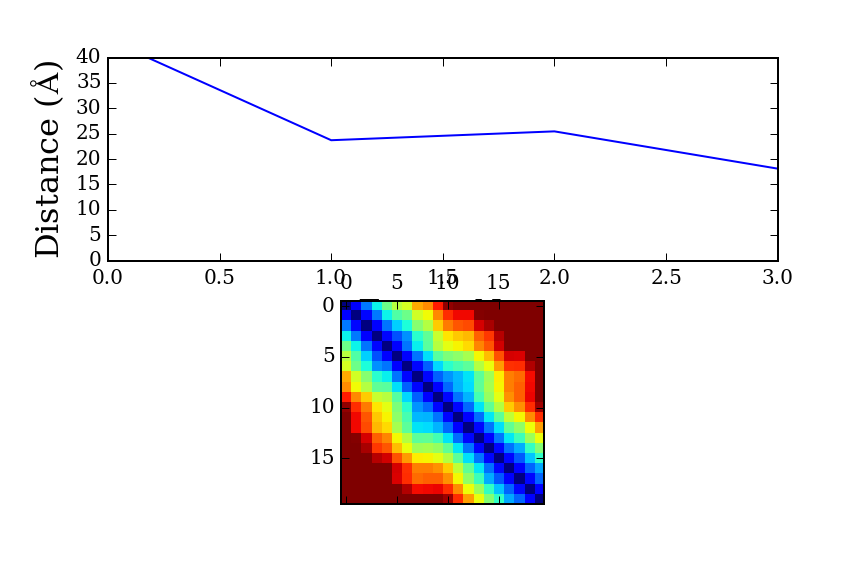
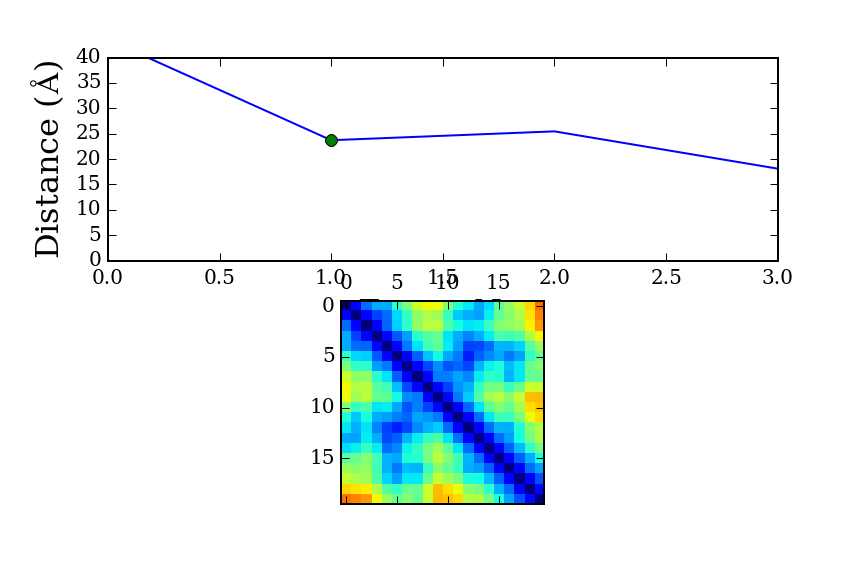
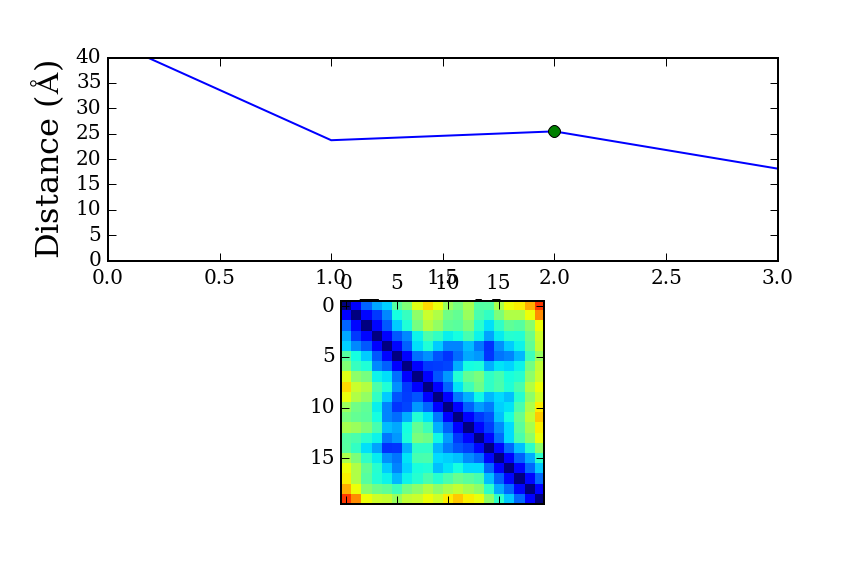
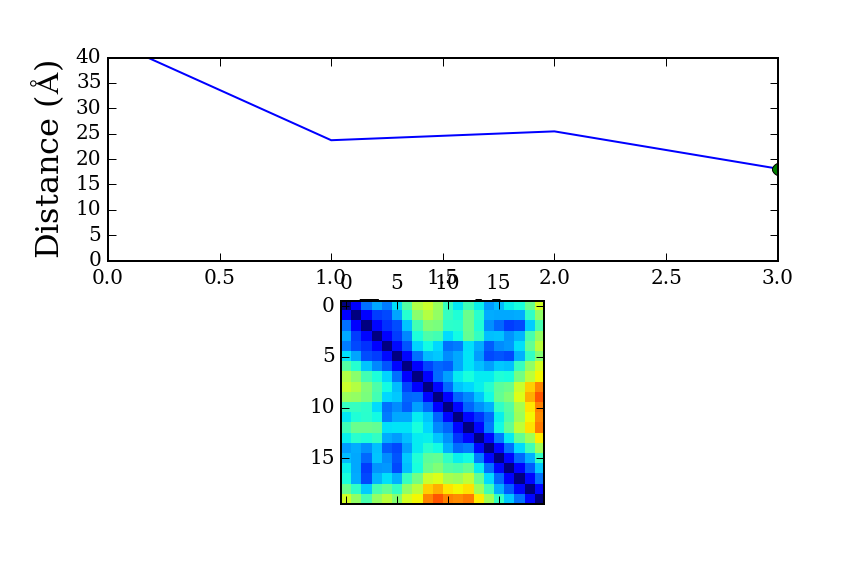

In [15]:
fig = plt.figure()
ax0 = fig.add_subplot(211)
ax = fig.add_subplot(212)

d0 = calc_matrix("@CA", traj[0], traj.top)[0]
print (d0)
n_rows, n_cols = d0.n_rows, d0.n_cols
cax = ax.matshow(np.zeros((n_rows, n_cols)))

def animate_traj(n_frame):
    # calculate distance matrix for given masks
    ax0.clear()
    ax0.plot(dist[:])
    ax0.set_ylabel(distance_txt, size=lb_size)
    ax0.set_xlabel(frame_no_txt, size=lb_size)
    ax0.set_ylim([0, 40])
    ax0.plot(n_frame, dist[n_frame], marker='o')
    
    d0 = calc_matrix("@CA", traj[n_frame], traj.top)[0]
    arr = np.asarray(d0.data).reshape(n_rows, n_cols)
    ax.clear()
    ax.matshow(arr, vmin=0., vmax=30)
    #fig.colorbar(cax, ax=ax)
    
    return fig

anim_traj = animation.FuncAnimation(fig, animate_traj, frames=traj.n_frames, 
                                    interval=200)
display_animation(anim_traj, default_mode='loop')